In [30]:
import sys

sys.path.insert(0,'src/')

In [31]:
%matplotlib widget
import matplotlib.pyplot as plt

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from taurex.cache import GlobalCache, OpacityCache

In [34]:
from atmopy.taurex import ATMOChemistry

In [36]:
OpacityCache().find_list_of_molecules()

{'C2H2',
 'C2H4',
 'C2H6',
 'CH4',
 'CIA',
 'CO',
 'CO2',
 'H2CO',
 'H2O',
 'H2S',
 'HCN',
 'HCl',
 'HF',
 'K',
 'MgH',
 'N2',
 'NH3',
 'NO',
 'NO2',
 'Na',
 'O2',
 'O3',
 'OCS',
 'OH',
 'PH3',
 'SH',
 'SO2',
 'SiH',
 'SiO',
 'TiO',
 'VO'}

In [37]:
from taurex.model import TransmissionModel
from taurex.contributions import AbsorptionContribution

In [38]:
'H2O' in tm.chemistry.gases 

True

In [39]:
tm = TransmissionModel(chemistry=ATMOChemistry(), nlayers=100)
tm.add_contribution(AbsorptionContribution())

taurex.TransmissionModel - INFO - No pressure profile defined, using simple pressure profile with
taurex.TransmissionModel - INFO - parameters nlayers: 100, atm_pressure_range=(0.0001,1000000.0)
taurex.TransmissionModel - WARNING - No planet defined, using Jupiter as planet
taurex.TransmissionModel - WARNING - No temeprature profile defined using default Isothermal profile with T=1500 K
taurex.TransmissionModel - WARNING - No star, using the Sun


In [23]:
tm.build()
tm.fittingParameters

taurex.TransmissionModel - INFO - Building model........
taurex.TransmissionModel - INFO - Collecting paramters
taurex.TransmissionModel - INFO - Setting up profiles
taurex.TransmissionModel - INFO - Computing pressure profile
taurex.ChemistryModel - INFO - Initializing chemistry model
taurex.TransmissionModel - INFO - Setting up contributions
taurex.TransmissionModel - INFO - DONE


{'planet_mass': ('planet_mass',
  '$M_p$',
  <bound method fitparam.<locals>.wrapper of <taurex.data.planet.Planet object at 0x125baea40>>,
  <bound method BasePlanet.mass of <taurex.data.planet.Planet object at 0x125baea40>>,
  'linear',
  False,
  [0.5, 1.5]),
 'planet_radius': ('planet_radius',
  '$R_p$',
  <bound method fitparam.<locals>.wrapper of <taurex.data.planet.Planet object at 0x125baea40>>,
  <bound method BasePlanet.radius of <taurex.data.planet.Planet object at 0x125baea40>>,
  'linear',
  True,
  [0.9, 1.1]),
 'planet_distance': ('planet_distance',
  '$D_{planet}$',
  <bound method fitparam.<locals>.wrapper of <taurex.data.planet.Planet object at 0x125baea40>>,
  <bound method BasePlanet.distance of <taurex.data.planet.Planet object at 0x125baea40>>,
  'linear',
  False,
  [1, 2]),
 'planet_sma': ('planet_sma',
  '$D_{planet}$',
  <bound method fitparam.<locals>.wrapper of <taurex.data.planet.Planet object at 0x125baea40>>,
  <bound method BasePlanet.semiMajorAxis of <t

In [24]:

res = tm.model()

taurex.TransmissionModel - INFO - Computing pressure profile
taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas O2 opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas H2CO opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas C2H2 opacity
taurex.Absorption - INFO - Recomputing active gas C2H4 opacity
taurex.Absorption - INFO - Recomputing active gas C2H6 opacity
taurex.Absorption - INFO - Recomputing active gas OH opacity
taurex.Absorption - INFO - Recomputing active gas N2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas NO opacity
taurex.Absorption - INFO - Recomputing active gas NO2 opacity
taurex.Absorption 

In [28]:
tm['metallicity'] = 10
res = tm.model()

taurex.TransmissionModel - INFO - Computing pressure profile
taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas O2 opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas H2CO opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas C2H2 opacity
taurex.Absorption - INFO - Recomputing active gas C2H4 opacity
taurex.Absorption - INFO - Recomputing active gas C2H6 opacity
taurex.Absorption - INFO - Recomputing active gas OH opacity
taurex.Absorption - INFO - Recomputing active gas N2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas NO opacity
taurex.Absorption - INFO - Recomputing active gas NO2 opacity
taurex.Absorption 

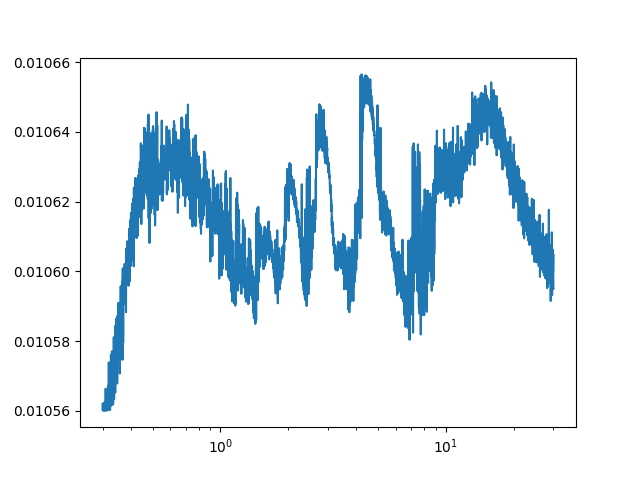

In [29]:
plt.figure()
plt.plot(10000/res[0],res[1])
plt.xscale('log')
plt.show()